# Usage Demo : 


In [5]:
!apt-get install swig

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,086 kB of archives.
After this operation, 5,413 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig4.0 amd64 4.0.1-5build1 [1,081 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 swig all 4.0.1-5build1 [5,528 B]
Fetched 1,086 kB in 1s (1,310 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.1-5build1_amd64.deb ...
Unpacking swig4.0 (4.0.1-5build1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.1-5build1_a

In [6]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:519: InformationOnly: Normalizing 'v0.2.3' to '0.2.3'
  self.metadata.version = self._normalize_version(
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
running build_ext
building '_sequencer_alsa' extension
swigging src/sequencer_alsa/sequencer_alsa.i to src/sequencer_alsa/sequencer_alsa_wrap.c
swig -python -I/usr/include -o src/sequencer_alsa/sequencer_alsa_wrap.c src/sequenc

In [7]:
!pip install git+https://github.com/vishnubob/python-midi@feature/python3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/vishnubob/python-midi (to revision feature/python3) to /tmp/pip-req-build-3x2d9hzi
  Running command git clone --filter=blob:none --quiet https://github.com/vishnubob/python-midi /tmp/pip-req-build-3x2d9hzi
  Running command git checkout -b feature/python3 --track origin/feature/python3
  Switched to a new branch 'feature/python3'
  Branch 'feature/python3' set up to track remote branch 'feature/python3' from 'origin'.
  Resolved https://github.com/vishnubob/python-midi to commit abb85028c97b433f74621be899a0b399cd100aaa
  Preparing metadata (setup.py) ... done
  Created wheel for midi: filename=midi-0.2.3-cp310-cp310-linux_x86_64.whl size=348497 sha256=8a2baec71ad77c49131c5b3eb749766e26d5c60511748c61f3888f6503daa146
  Stored in directory: /tmp/pip-ephem-wheel-cache-h40h7z0c/wheels/07/67/b5/a8eeff61b2f6e3f7fda1010525639b13e384cea72c64e2af73
Successfully built m

In [8]:
pip install midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 69.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=6fc6d7839bad4725d3149752f938d5b8075cfaa6617048e8e03f30f0dfb57c5c
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [10]:
import midi
import glob
import numpy as np
import pretty_midi
import seaborn as sns
import matplotlib.pyplot as plt
from mgeval import core, utils
from sklearn.model_selection import LeaveOneOut

## Absolute measurement: statistic analysis


Assign dataset path

In [11]:
set1 = glob.glob('./data/set1/*.mid')

construct empty dictionary to fill in measurement across samples

In [15]:
num_samples = 55

In [19]:
set1_eval = {'total_used_pitch':np.zeros((num_samples,1))}
metrics_list = list(set1_eval.keys())
for i in range(0, num_samples):
    feature = core.extract_feature(set1[i])
    set1_eval[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

repeat for second dataset

In [21]:
set2 = glob.glob('./data/set2/*.mid')
set2_eval = {'total_used_pitch':np.zeros((num_samples,1))}
for i in range(0, num_samples):
    feature = core.extract_feature(set2[i])
    set2_eval[metrics_list[0]][i] = getattr(core.metrics(), metrics_list[0])(feature)

statistic analysis: absolute measurement

In [23]:
for i in range(0, len(metrics_list)):
    print (metrics_list[i] + ':')
    print ('------------------------')
    print (' demo_set')
    print ('  mean: ', np.mean(set1_eval[metrics_list[i]], axis=0))
    print ('  std: ', np.std(set1_eval[metrics_list[i]], axis=0))

    print ('------------------------')
    print (' demo_set')
    print ('  mean: ', np.mean(set2_eval[metrics_list[i]], axis=0))
    print ('  std: ', np.std(set2_eval[metrics_list[i]], axis=0))


total_used_pitch:
------------------------
 demo_set
  mean:  [44.43636364]
  std:  [9.15872884]
------------------------
 demo_set
  mean:  [6.16363636]
  std:  [2.36461518]


## Relative measurement: generalizes the result among features with various dimensions


the features are sum- marized to 
- the intra-set distances
- the difference of intra-set and inter-set distances.

exhaustive cross-validation for intra-set distances measurement

In [24]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
set1_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
set2_intra = np.zeros((num_samples, len(metrics_list), num_samples-1))
for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        set1_intra[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set1_eval[metrics_list[i]][train_index])
        set2_intra[test_index[0]][i] = utils.c_dist(set2_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]][train_index])


exhaustive cross-validation for inter-set distances measurement

In [25]:
loo = LeaveOneOut()
loo.get_n_splits(np.arange(num_samples))
sets_inter = np.zeros((num_samples, len(metrics_list), num_samples))

for i in range(len(metrics_list)):
    for train_index, test_index in loo.split(np.arange(num_samples)):
        sets_inter[test_index[0]][i] = utils.c_dist(set1_eval[metrics_list[i]][test_index], set2_eval[metrics_list[i]])

visualization of intra-set and inter-set distances

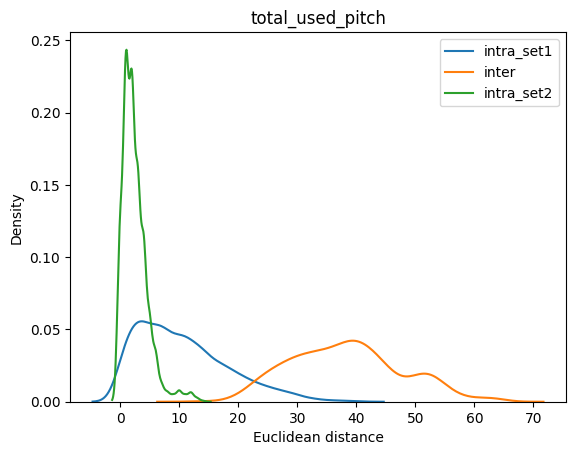

In [27]:
plot_set1_intra = np.transpose(set1_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_set2_intra = np.transpose(set2_intra,(1, 0, 2)).reshape(len(metrics_list), -1)
plot_sets_inter = np.transpose(sets_inter,(1, 0, 2)).reshape(len(metrics_list), -1)
for i in range(0,len(metrics_list)):
    sns.kdeplot(plot_set1_intra[i], label='intra_set1')
    sns.kdeplot(plot_sets_inter[i], label='inter')
    sns.kdeplot(plot_set2_intra[i], label='intra_set2')
    plt.legend()

    plt.title(metrics_list[i])
    plt.xlabel('Euclidean distance')
    plt.show()

the difference of intra-set and inter-set distances.

In [28]:
for i in range(0, len(metrics_list)):
    print (metrics_list[i] + ':')
    print ('------------------------')
    print (' demo_set1')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set1_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set1_intra[i], plot_sets_inter[i]))
    
    print (' demo_set2')
    print ('  Kullback–Leibler divergence:',utils.kl_dist(plot_set2_intra[i], plot_sets_inter[i]))
    print ('  Overlap area:', utils.overlap_area(plot_set2_intra[i], plot_sets_inter[i]))
    

total_used_pitch:
------------------------
 demo_set1
  Kullback–Leibler divergence: 1.0996811203218289
  Overlap area: 0.12483389381409624
 demo_set2
  Kullback–Leibler divergence: 2.004585580001513
  Overlap area: 0.0012263630840538314
